# Buscamos el estado meteorológico por fecha y hora para reemplazar los valores nulos de esta columna

In [2]:
import pandas as pd

Iniciamos verificando los tipos de datos que hay en la columna estado meteorológico para saber los valores a reemplazar

In [3]:
combined_data = pd.read_csv('Datasets/Data_Combinada.csv')
combined_data['estado_meteorológico'].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18912\3830316172.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('Datasets/Data_Combinada.csv')


Despejado         56670
Nublado            4653
Lluvia débil       3984
LLuvia intensa      957
Se desconoce        459
Granizando           13
Nevando               6
Name: estado_meteorológico, dtype: int64

Cuando el valor sea desconocido los convertimos a nulo para reemplazarlos con los nulos, ya que esto no nos aporta información adicional

In [4]:
combined_data.loc[combined_data['estado_meteorológico'] == 'Se desconoce'] = None
combined_data['estado_meteorológico'].value_counts()

Despejado         56670
Nublado            4653
Lluvia débil       3984
LLuvia intensa      957
Granizando           13
Nevando               6
Name: estado_meteorológico, dtype: int64

In [5]:
weather_data_sep23 = pd.read_csv('./Datasets/sep_meteo23.csv', sep = ';')
weather_data_sep23.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V


Limpiamos las filas duplicadas o filas completamente nulas las eliminamos para evitar tener datos repetidos

In [6]:
weather_data_sep23.drop_duplicates(inplace=True)
weather_data_sep23.dropna(how='all', inplace=True)
weather_data_sep23

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,28,79,59,89,28079059_89_98,2023,9,26,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2765,28,79,59,89,28079059_89_98,2023,9,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2766,28,79,59,89,28079059_89_98,2023,9,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2767,28,79,59,89,28079059_89_98,2023,9,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


### Eliminamos las filas que no nos ayuden a saber el estado

Eliminamos las siguientes columnas:
 1. **Provincia, Municipio, Estación y Punto Muestreo**, ya que no nos vamos a especificar tan detalladamente la localización
2. Trabajamos sobre las columnas que comiencen en '**V**', ya que estas solo verifican si el valor es valido, cuando sea 'N' eliminamos ese dato, ya que no es válido y luego eliminamos estas columnas.

In [7]:
# Filtrar filas donde cualquier columna que comience con "V" contenga 'N'
cols_v = [col for col in weather_data_sep23.columns if col.startswith('V')]
weather_data_sep23.drop(index=weather_data_sep23[weather_data_sep23[cols_v].isin(['N']).any(axis=1)].index, inplace=True)

# Eliminar columnas específicas directamente en el df
columns_to_drop = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'PUNTO_MUESTREO']
weather_data_sep23.drop(columns=columns_to_drop, inplace=True, errors='ignore')

weather_data_sep23[cols_v].value_counts()

V01  V02  V03  V04  V05  V06  V07  V08  V09  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24
V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V      2152
dtype: int64

### Eliminamos las columnas que comiencen con 'V', ya que eliminamos los datos que no estaban aprobados

In [8]:
weather_data_sep23.drop(columns= cols_v)

,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
210,81,2023,9,1,0.23,0.17,0.45,0.20,0.08,0.07,...,2.57,2.73,2.15,1.65,1.72,2.13,1.90,0.97,0.58,0.30
211,81,2023,9,2,0.05,0.37,0.68,0.47,0.03,1.07,...,2.92,3.52,3.37,3.63,3.08,2.83,3.02,3.02,2.35,1.42
212,81,2023,9,3,0.70,1.15,1.25,1.65,1.15,0.62,...,2.23,2.13,1.78,1.62,1.88,1.38,1.25,1.03,2.20,1.92
213,81,2023,9,4,1.05,0.48,0.23,1.08,0.50,1.30,...,0.57,0.77,1.02,1.47,1.25,1.15,0.48,0.80,0.60,0.92
214,81,2023,9,5,0.27,0.02,0.02,0.23,0.32,0.18,...,1.37,1.20,1.38,1.42,0.97,0.63,0.43,0.03,0.20,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,89,2023,9,26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2765,89,2023,9,27,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2766,89,2023,9,28,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2767,89,2023,9,29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Tabla de Códigos de Magnitud:

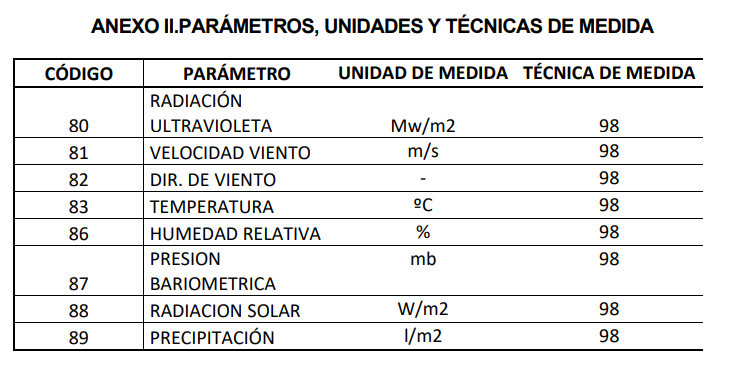

In [9]:
from IPython.display import display, Image
display(Image(filename='Images/Captura de pantalla 2023-11-16 162330.png'))

Eliminamos de la columna magnitud los siguientes códigos que no nos interesan en este momento:
1. **80 (Radiación Ultravioleta)**
2. **82 (Dirección del viento)**
3. **86 (Humedad Relativa)**
4. **87 (Presión Barométrica)**

In [10]:
mask_unwanted = weather_data_sep23[weather_data_sep23['MAGNITUD'].isin([80, 82, 86, 87])].index
weather_data_sep23.drop(index = mask_unwanted, inplace=True)
weather_data_sep23['MAGNITUD'].value_counts()

83    650
89    217
81    189
88    159
Name: MAGNITUD, dtype: int64